# Data Analysis with Pandas
## Dataset : vgs_ds
## Odeh Abuzaid
## 25/10/2021

In [462]:
import pandas as dt
import matplotlib.pyplot as plt

In [463]:
vgs_ds = dt.read_csv('./input/vgsales.csv')
vgs_ds

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


*most common publisher*

In [464]:
most_common_ds = vgs_ds.Publisher
most_common_ds.mode()

str = most_common_ds.value_counts().idxmax()
print(type(str))
str = most_common_ds.mode()
print(type(str))
print(*str,sep='\n')

<class 'str'>
<class 'pandas.core.series.Series'>
Electronic Arts


*What’s the most common platform*

In [465]:
most_common_ds = vgs_ds.Platform
str = most_common_ds.value_counts().idxmax()
print(type(str))
str = most_common_ds.mode()
print(type(str))
print(*str,sep='\n')

<class 'str'>
<class 'pandas.core.series.Series'>
DS


*What about the most common genre?*

In [466]:
most_common_ds = vgs_ds.Genre
str = most_common_ds.value_counts().idxmax()
print(type(str))
str = most_common_ds.mode()
print(type(str))
print(*str,sep='\n')

<class 'str'>
<class 'pandas.core.series.Series'>
Action


*What are the top 20 highest grossing games*

In [467]:
most_common_ds = vgs_ds.sort_values('Global_Sales', ascending=False)
str = most_common_ds.head(20)[['Name','Global_Sales']].set_index("Global_Sales")

str

,Name
Global_Sales,
82.74,Wii Sports
40.24,Super Mario Bros.
35.82,Mario Kart Wii
33.00,Wii Sports Resort
31.37,Pokemon Red/Pokemon Blue
30.26,Tetris
30.01,New Super Mario Bros.
29.02,Wii Play
28.62,New Super Mario Bros. Wii


In [468]:
most_common_ds = vgs_ds.set_index("Global_Sales") 
vgs_ds.sort_index()

str = most_common_ds.head(20).Name

str

Global_Sales
82.74                                      Wii Sports
40.24                               Super Mario Bros.
35.82                                  Mario Kart Wii
33.00                               Wii Sports Resort
31.37                        Pokemon Red/Pokemon Blue
30.26                                          Tetris
30.01                           New Super Mario Bros.
29.02                                        Wii Play
28.62                       New Super Mario Bros. Wii
28.31                                       Duck Hunt
24.76                                      Nintendogs
23.42                                   Mario Kart DS
23.10                     Pokemon Gold/Pokemon Silver
22.72                                         Wii Fit
22.00                                    Wii Fit Plus
21.82                              Kinect Adventures!
21.40                              Grand Theft Auto V
20.81                   Grand Theft Auto: San Andreas
20.61          

For North American video game sales, what’s the median?

Provide a secondary output showing ten games surrounding the median sales output

assume that games with same median value are sorted in descending order

In [469]:

most_common_ds = vgs_ds.NA_Sales
na_games_sales_median = most_common_ds.median()
na_games_sales_median

surrounding_the_median = vgs_ds.NA_Sales

less_median = vgs_ds[vgs_ds.NA_Sales < na_games_sales_median ].Name.head(5)
greater_meadian = vgs_ds[vgs_ds.NA_Sales > na_games_sales_median ].Name.head(5)

around = vgs_ds[vgs_ds.NA_Sales == na_games_sales_median ].Name.head(10)

print(*around,sep="\n")


Dragon Warrior IV
World Soccer Winning Eleven 7 International
Farming Simulator 2015
Pro Evolution Soccer 2008
Winning Eleven: Pro Evolution Soccer 2007 (All Region sales)
Phantasy Star Portable 2
The Sims 2: Castaway
SingStar Queen
Top Spin 3
Sonic & All-Stars Racing Transformed


*For the top-selling game of all time, 

how many standard deviations 

above/below 

the `mean` 

are its sales for North America?*

In [470]:
# For the top-selling game of all time
top_selling = vgs_ds.set_index("Global_Sales")
top_selling

mean = top_selling.NA_Sales.mean()
mean

top_sellig_game = top_selling.NA_Sales.head(1)
top_sellig_game

std_na_sales = vgs_ds.NA_Sales.std()
std_na_sales


stds_na_sales_count = ((top_sellig_game - mean) / std_na_sales)
stds_na_sales_count


Global_Sales
82.74    50.478988
Name: NA_Sales, dtype: float64

# The Nintendo Wii seems to have outdone itself with games. 
## How does its average number of sales compare with all of the other platforms?

In [471]:
wii = vgs_ds.loc[vgs_ds.Platform == 'Wii']
wii_sales_avrg = wii.Global_Sales.mean()
# avarage value of all Wii platform sales globaly 


all_other = vgs_ds.loc[vgs_ds.Platform != 'Wii']
all_other_avrg = all_other.Global_Sales.mean()
# avarage value of all Wii platform sales globaly 

all = [wii_sales_avrg,all_other_avrg]

all

print(wii_sales_avrg - all_other_avrg)




0.17601413173327207


In [472]:
wii = vgs_ds.loc[vgs_ds.Platform == 'Wii']
wii_sales_avrg = wii.Global_Sales.mean()
wii_by_year = wii.sort_values('Year', ascending=False)

to_year = wii_by_year.head(1).Year
to_year

6465    2015.0
Name: Year, dtype: float64

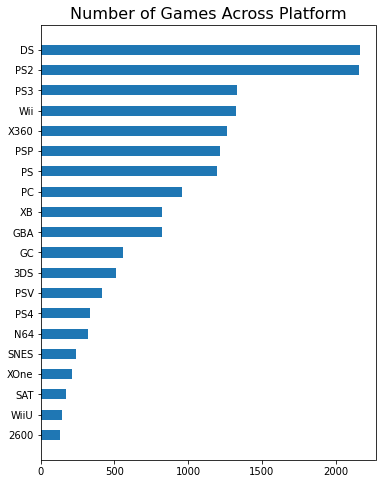

In [473]:
platform=dt.DataFrame(vgs_ds.Platform.value_counts())
platform.reset_index(inplace=True)
platform.rename(columns={'Platform': 'Number of Games', 'index': 'Platform'},inplace=True)
platform.drop(platform.index[20:],inplace=True)
platform.sort_values('Number of Games',inplace=True)
plt.figure(figsize=(6,8))
plt.barh(platform.Platform,platform['Number of Games'],height=0.5)
plt.title('Number of Games Across Platform',fontsize=16)
plt.show()

In [474]:
# def test():

#     def assert_equal(actual,expected):
#         assert actual == expected, f"Expected {expected} but got {actual}"

#     assert_equal(most_common_publisher, "Electronic Arts")
#     assert_equal(most_common_platform, None)
#     assert_equal(most_common_genre, None)
#     assert_equal(top_twenty_highest_grossing_games.iloc[0].Name, None)
#     assert_equal(top_twenty_highest_grossing_games.iloc[19].Name, None)
#     assert_equal(na_median_sales, None)
#     assert_equal(ten_median_na_seller_names, None)

#     print("Success!!!")